In [45]:
import json
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [46]:
radar_file = "./data/test_file_new.json"

import json
with open(radar_file) as injson:
     data = json.load(injson)

In [47]:
c = 299792458 # in m/s
radar_bw = 1.5e+9 # bandwidth in hz
radar_rr = c/(2*radar_bw)
print(radar_rr)

0.09993081933333334


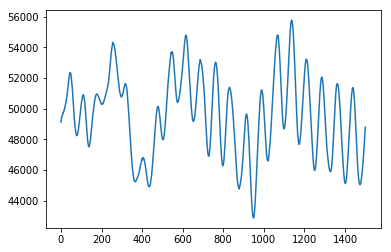

In [48]:
radar_data = data[0]['Data']
plt.plot(radar_data)

In [49]:
from scipy import signal
nfft = len(radar_data)
radar_detrended = signal.detrend(radar_data, type='linear')
radar_hann = np.hanning(nfft)*radar_detrended

In [51]:
K = 5
radar_np = np.asarray(radar_hann)
pad_len = (K-1)*len(radar_np)
radar_pad = np.pad(radar_np, (0,pad_len), 'constant',constant_values=0)
radar_spectrum =abs(scipy.fft(radar_pad))

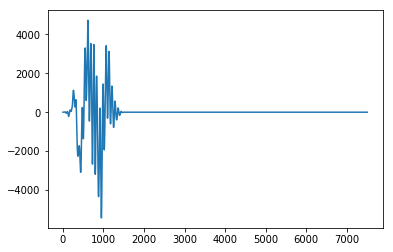

In [52]:
plt.plot(radar_pad)

In [55]:
distance = np.arange(0, len(radar_spectrum))*(radar_rr/K)
print(len(distance))
print(len(radar_spectrum))

7505
7505


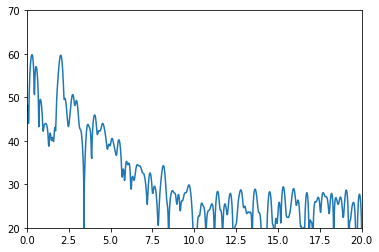

In [57]:
fig, ax = plt.subplots()
ax.plot(distance,10*np.log10(radar_spectrum))
#ax.imshow(10*np.log10(radar_dat.data), interpolation='nearest', cmap="gist_gray")
#ax.plot(l_si, color='r')
#ax.plot(l_as, color='b')
ax.set_xlim([0, 20])
ax.set_ylim([20, 70])
#fig.rcParams['figure.figsize'] = [500, 5]
plt.show()

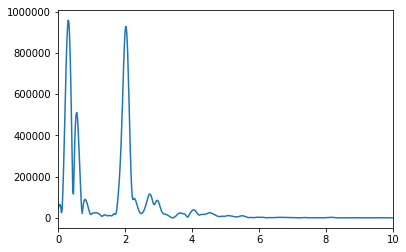

In [58]:
fig, ax = plt.subplots()
ax.plot(distance,radar_spectrum)
#ax.imshow(10*np.log10(radar_dat.data), interpolation='nearest', cmap="gist_gray")
#ax.plot(l_si, color='r')
#ax.plot(l_as, color='b')
ax.set_xlim([0, 10])
#ax.set_ylim([20, 70])
#fig.rcParams['figure.figsize'] = [500, 5]
plt.show()